# Result Analysis Sentence Level
### Using mistral-saba-24b
## By Abhisek Sarkar (as20ms091@iiserkol.ac.in)
## Supervised by Prof. Kripabandhu Ghosh

#### Importing necessery packages

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix
import numpy as np

### Load the CSV File

In [2]:
# Load the dataset
file_path = "/home/abhisek/Thesis/Part_3/Part 4/Output/output_sentence_level_mistral-saba-24b.csv"
df = pd.read_csv(file_path)

In [3]:
# Display first few rows
df.head()

,Case,actual_result,LLM_prediction,Modified_text_prediction
0,1955_R_9.txt,1,1,1
1,1956_B_14.txt,0,1,1
2,1961_S_90.txt,1,0,0
3,1962_S_93.txt,1,1,0
4,1963_M_27.txt,1,1,0


We can see the data is properly loaded

### Display basic information about the dataset



In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237 entries, 0 to 236
Data columns (total 4 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Case                      237 non-null    object
 1   actual_result             237 non-null    int64 
 2   LLM_prediction            237 non-null    int64 
 3   Modified_text_prediction  237 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 7.5+ KB


The dataset contains four columns. The first column, labeled 'Case', lists the case file names. The second column, 'actual result', indicates the actual outcome of each case, represented by a binary value: 1 signifies that the applicant won, and 0 signifies that the applicant did not win. The third column, 'LLM_prediction', presents the Large Language Model's (LLM) predictions based on the original case texts. Finally, the fourth column, 'Modified_text_prediction', shows the LLM's predictions based on the Retrieval-Augmented Generation (RAG) modified case texts

In [5]:
# Check for missing values
df.isnull().sum()

Case                        0
actual_result               0
LLM_prediction              0
Modified_text_prediction    0
dtype: int64

There is no missing value in the data set

In [6]:
# Display summary statistics
df.describe()

,actual_result,LLM_prediction,Modified_text_prediction
count,237.000000,237.000000,237.000000
mean,0.426160,0.586498,0.527426
std,0.495564,0.493504,0.500304
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,0.000000,1.000000,1.000000
75%,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000


### Comparison

In [7]:
col2 = df.iloc[:, 1]  # Second column
col3 = df.iloc[:, 2]  # Third column
col4 = df.iloc[:, 3]  # Fourth column
# Function to calculate percentage similarity
def calculate_similarity(col_ref, col_compare):
    similarity_count = (col_ref == col_compare).sum()
    total_count = len(col_ref)
    similarity_percentage = (similarity_count / total_count) * 100
    return similarity_percentage

# Calculate similarity of Column 3 and Column 4 with Column 2
similarity_2_3 = calculate_similarity(col2, col3)
similarity_2_4 = calculate_similarity(col2, col4)
similarity_3_4 = calculate_similarity(col3, col4)

print(f"LLM prediction on actual text is {similarity_2_3:.2f}% similar to actual legal result")
print(f"LLM prediction on modified legal text is {similarity_2_4:.2f}% similar to actual legal result")
print(f"LLM prediction on modified legal text is {similarity_3_4:.2f}% similar to LLM prediction on actual text")

LLM prediction on actual text is 56.96% similar to actual legal result
LLM prediction on modified legal text is 45.15% similar to actual legal result
LLM prediction on modified legal text is 63.71% similar to LLM prediction on actual text


From this we can see that the actual result is differing from the actual result and the accuracy of LLM's prediction is approx 57%
And when we have modified the stereotypic text with reality then we can see it has differed the LLM's prediction and the difference is approx 12%

In [8]:
# Compute basic statistics
comparison_2_3 = col2.compare(col3)
comparison_2_4 = col2.compare(col4)

# Display differences
print("Differences between Column 2 and Column 3:\n", comparison_2_3.head())
print("Differences between Column 2 and Column 4:\n", comparison_2_4.head())


Differences between Column 2 and Column 3:
     self  other
1    0.0    1.0
2    1.0    0.0
7    0.0    1.0
9    1.0    0.0
11   0.0    1.0
Differences between Column 2 and Column 4:
    self  other
1   0.0    1.0
2   1.0    0.0
3   1.0    0.0
4   1.0    0.0
5   0.0    1.0


In [9]:
# Compute correlation
correlation_2_3 = col2.corr(col3)
correlation_2_4 = col2.corr(col4)
correlation_3_4 = col3.corr(col4)

print("Correlation between Column 2 and Column 3:", correlation_2_3)
print("Correlation between Column 2 and Column 4:", correlation_2_4)
print("Correlation between Column 3 and Column 4:", correlation_3_4)


Correlation between Column 2 and Column 3: 0.16916588127817708
Correlation between Column 2 and Column 4: -0.09006753551358163
Correlation between Column 3 and Column 4: 0.26923091651302566


#### Correlation between Actual Result and LLM Prediction on Original Text: **0.1692**  
This reflects a **weak positive correlation**. The LLM’s predictions on the original, unmodified case texts show limited alignment with the actual outcomes. While there is some predictive connection, the low value suggests that the model only partially captured the patterns or linguistic signals associated with the real decisions when relying on the original text alone.

#### Correlation between Actual Result and LLM Prediction after Contradictory Reality Augmentation: **-0.0901**  
This correlation turns **slightly negative**, indicating **almost no meaningful relationship**—and in fact, a slight tendency toward inconsistency—between the model’s predictions and actual outcomes after the text was modified.  
Since we **augmented** the original stereotypic sentences with **contradictory reality statements**, this suggests that the added contradictions confused the model, disrupting whatever biased or superficial cues it had been relying upon for its original predictions.

#### Correlation between LLM Predictions on Original Text and Augmented Text: **0.2692**  
This reflects a **weak positive correlation** between the model’s predictions before and after augmentation. Although there is some residual alignment, the low correlation shows that the model often changed its predictions once the contradictory statements were introduced, further highlighting its vulnerability to content structure and framing.

---

### Summary Insight

The eversal in correlation after introducing contradictory reality statements suggests that the LLM's decision-making was based on surface-level cues—particularly stereotypical or stylistic patterns in the original text.  
The findings underscore the importance of **stress-testing models with augmented, adversarial examples** to uncover hidden biases and to ensure robustness, especially in high-stakes domains like legal prediction.

#### Correlation heatmap:
Now we will plot a heatmap to visualise the correlation

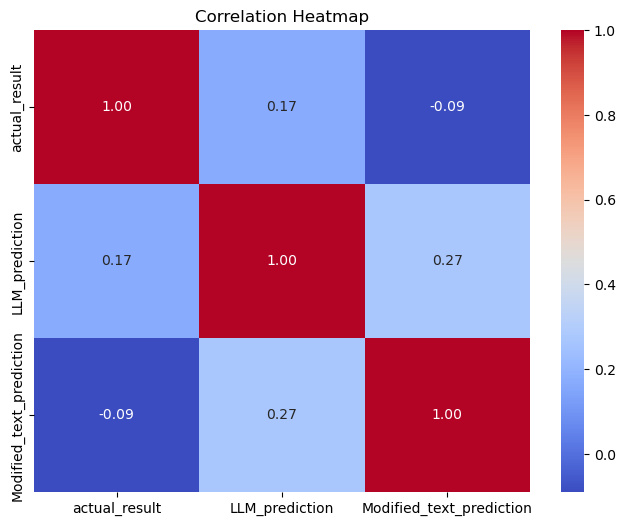

In [10]:
# Correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df.iloc[:, 1:4].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

To understand how the actual case outcomes compare to the LLM’s predictions Now I want to check the distribution of actual and predicted case decisions in the dataset. By analyzing these distributions, we can identify biases in the model’s decision-making process, especially before and after modifying the stereotype with reality. This helps us assess whether the model relies on stereotype to make judgments and whether the modification affects its predictions. In short examining these distributions ensures fairness, reliability, and the validity of our experiment.

In [11]:
# Count the occurrences of 1 and 0 in the 'actual_result' column
ones_count = df['actual_result'].value_counts().get(1, 0)  # Default to 0 if 1 is not present
zeros_count = df['actual_result'].value_counts().get(0, 0)  # Default to 0 if 0 is not present

# Print the counts
print(f"Number of cases with actual_result = 1: {ones_count}")
print(f"Number of cases with actual_result = 0: {zeros_count}")

Number of cases with actual_result = 1: 101
Number of cases with actual_result = 0: 136


In [12]:
# Count the occurrences of 1 and 0 in the 'LLM_prediction' column
ones_count_LLMac = df['LLM_prediction'].value_counts().get(1, 0)  # Default to 0 if 1 is not present
zeros_count_LLMac = df['LLM_prediction'].value_counts().get(0, 0)  # Default to 0 if 0 is not present

# Print the counts
print(f"Number of cases with LLM_prediction = 1: {ones_count_LLMac}")
print(f"Number of cases with LLM_prediction = 0: {zeros_count_LLMac}")


# Count the occurrences of 1 and 0 in the 'Modified_text_prediction' column
ones_count_LLMmod = df['Modified_text_prediction'].value_counts().get(1, 0)  # Default to 0 if 1 is not present
zeros_count_LLMmod = df['Modified_text_prediction'].value_counts().get(0, 0)  # Default to 0 if 0 is not present

# Print the counts
print(f"Number of cases with Modified_text_prediction = 1: {ones_count_LLMmod}")
print(f"Number of cases with Modified_text_prediction = 0: {zeros_count_LLMmod}")

Number of cases with LLM_prediction = 1: 139
Number of cases with LLM_prediction = 0: 98
Number of cases with Modified_text_prediction = 1: 125
Number of cases with Modified_text_prediction = 0: 112


/tmp/ipykernel_7579/2130026487.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='actual_result', data=df, palette="Set2")


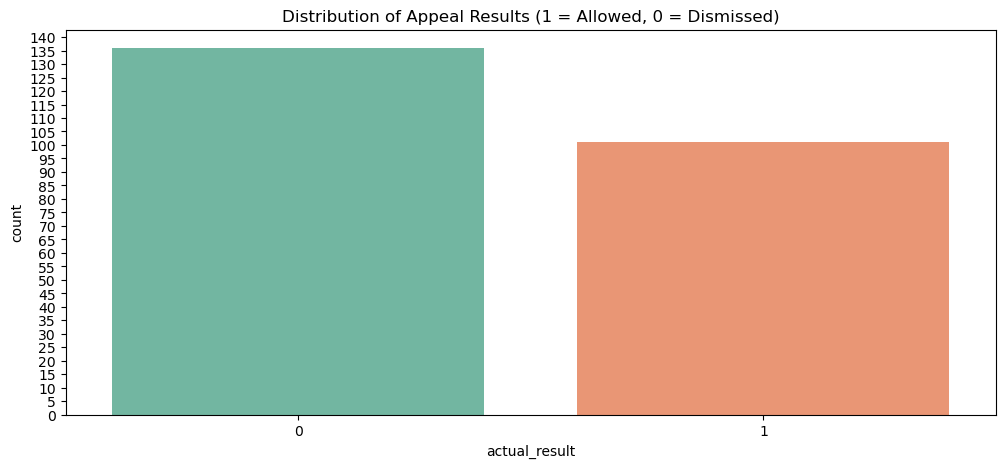

/tmp/ipykernel_7579/2130026487.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='LLM_prediction', data=df, palette="Set2")


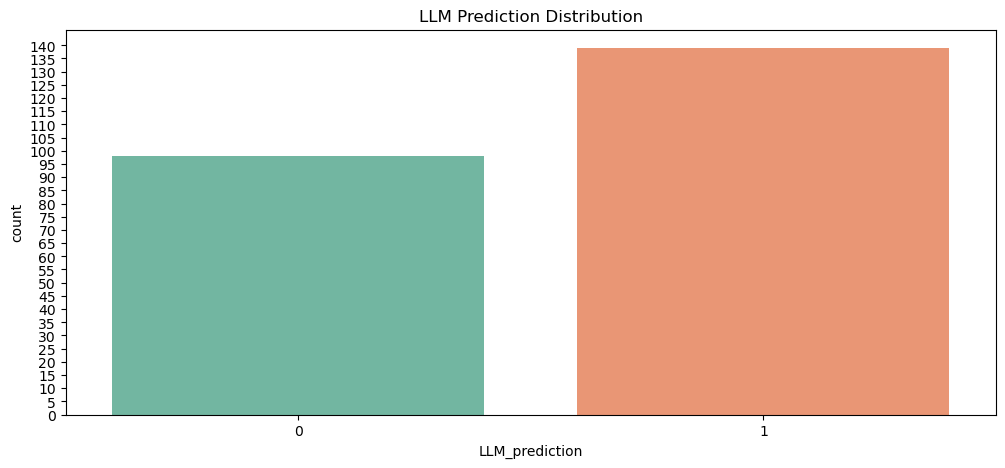

/tmp/ipykernel_7579/2130026487.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Modified_text_prediction', data=df, palette="Set2")


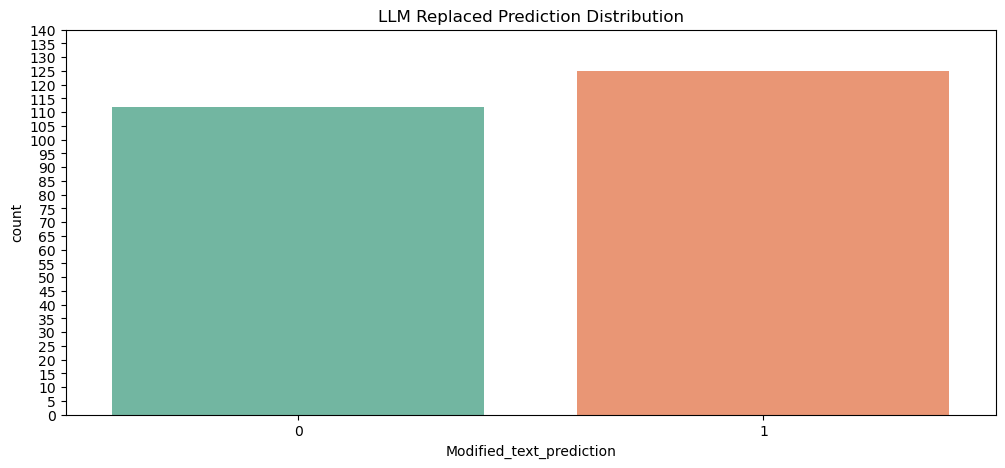

In [13]:
# Set common Y-axis ticks
max_count = max(df['actual_result'].value_counts().max(),
                df['LLM_prediction'].value_counts().max(),
                df['Modified_text_prediction'].value_counts().max())
yticks = np.arange(0, max_count + 5, 5)

# Distribution of appeal results
plt.figure(figsize=(12, 5))
sns.countplot(x='actual_result', data=df, palette="Set2")
plt.yticks(yticks)
plt.title("Distribution of Appeal Results (1 = Allowed, 0 = Dismissed)")
plt.show()

# LLM prediction distribution
plt.figure(figsize=(12, 5))
sns.countplot(x='LLM_prediction', data=df, palette="Set2")
plt.yticks(yticks)
plt.title("LLM Prediction Distribution")
plt.show()

# LLM replaced prediction distribution
plt.figure(figsize=(12, 5))
sns.countplot(x='Modified_text_prediction', data=df, palette="Set2")
plt.yticks(yticks)
plt.title("LLM Replaced Prediction Distribution")
plt.show()


### Analysis of Appeal Outcome Distributions

The three bar plots show how LLM predictions change before and after modifying stereotypical language in legal texts.

---

### 1. Actual Case Results  
- **Dismissed (0)**: 136 cases  
- **Allowed (1)**: 101 cases  
- **Insight**: Slight imbalance favoring dismissals, representing the real distribution of outcomes.

---

### 2. LLM Predictions on Original Text  
- **Dismissed (0)**: 98 cases  
- **Allowed (1)**: 139 cases  
- **Insight**: LLM predictions are skewed towards more positive outcomes compared to the real distribution, suggesting reliance on **latent stereotypical cues** present in the original texts.

---

### 3. LLM Predictions After Contradictory Augmentation  
- **Dismissed (0)**: 112 cases  
- **Allowed (1)**: 125 cases  
- **Insight**: After replacing stereotypical sentences with contradictory realities, the LLM's optimism decreases, and predictions shift closer to the true dismissal rate.

---

### Key Conclusion

- **Before modification**, the LLM heavily relied on stereotypical language patterns to predict favorable outcomes.
- **After modifying the text** to counter the stereotypes, the LLM’s judgment changed noticeably, indicating that **surface-level biased cues** had influenced its predictions.
- This shift highlights the **model's vulnerability to linguistic framing** and underlines the urgent need for **debiasing strategies** in legal AI systems.

---

In [14]:
# Calculate performance metrics for LLM on original text
accuracy_original = accuracy_score(df['actual_result'], df['LLM_prediction'])
precision_original = precision_score(df['actual_result'], df['LLM_prediction'])
recall_original = recall_score(df['actual_result'], df['LLM_prediction'])
f1_original = f1_score(df['actual_result'], df['LLM_prediction'])

# Calculate performance metrics for LLM on replaced text
accuracy_replaced = accuracy_score(df['actual_result'], df['Modified_text_prediction'])
precision_replaced = precision_score(df['actual_result'], df['Modified_text_prediction'])
recall_replaced = recall_score(df['actual_result'], df['Modified_text_prediction'])
f1_replaced = f1_score(df['actual_result'], df['Modified_text_prediction'])

print(f"Original LLM Accuracy: {accuracy_original:.2f}")
print(f"Original LLM Precision: {precision_original:.2f}")
print(f"Original LLM Recall: {recall_original:.2f}")
print(f"Original LLM F1 Score: {f1_original:.2f}")

print(f"Replaced LLM Accuracy: {accuracy_replaced:.2f}")
print(f"Replaced LLM Precision: {precision_replaced:.2f}")
print(f"Replaced LLM Recall: {recall_replaced:.2f}")
print(f"Replaced LLM F1 Score: {f1_replaced:.2f}")


Original LLM Accuracy: 0.57
Original LLM Precision: 0.50
Original LLM Recall: 0.68
Original LLM F1 Score: 0.57
Replaced LLM Accuracy: 0.45
Replaced LLM Precision: 0.38
Replaced LLM Recall: 0.48
Replaced LLM F1 Score: 0.42


### Evaluation of LLM Performance: Original vs. Rewritten Texts

To assess the impact of textual modification on the performance of the language model, we evaluated both versions of the model—before and after stereotype-related language was replaced—using four standard classification metrics:

1. **Accuracy**: Measures the overall correctness of predictions—i.e., how often the model's predictions match the actual outcomes.
2. **Precision**: Indicates how reliable the model's positive predictions are. In this case, it reflects how often the model is correct when it predicts that an appeal will be allowed.
3. **Recall**: Captures the model's ability to identify all actual instances of allowed appeals. A higher recall means fewer false negatives.
4. **F1 Score**: Represents the harmonic mean of precision and recall, offering a balanced measure when both false positives and false negatives are important.

---

### LLM Performance Before and After Replacing Stereotypes

| Metric     | Original Text | Rewritten Text |
|------------|---------------|----------------|
| Accuracy   | 0.57          | 0.45           |
| Precision  | 0.50          | 0.38           |
| Recall     | 0.68          | 0.48           |
| F1 Score   | 0.57          | 0.42           |

---

### Key Observations:
- **Performance Drop After Modification**:  
  Accuracy, precision, recall, and F1 score all declined after augmenting  contradictory reality after stereotypical language.

- **Model Reliance on Biased Language**:  
  The LLM initially performed better because it leaned on stereotypical cues present in the original texts.

- **Judgment Shift After Augmentation**:  
  Once stereotypical phrases were replaced, the model’s judgment ability weakened, exposing its **dependence on biased linguistic patterns** rather than true legal reasoning.

---

### Final Insight:
**Augmenting contradictory realities disrupts the LLM's decision-making**, clearly revealing that the model’s judgments were influenced by stereotypes.  
This highlights the urgent need for **debiasing strategies** to ensure fair and robust legal AI systems.

---

### Confusion Matrix
To evaluate the performance now I am trying to apply confusion matrix to my output result dataset.

```
True Positives (TP): Correctly predicted "Allowed" cases.
True Negatives (TN): Correctly predicted "Dismissed" cases.
False Positives (FP): Incorrectly predicted "Allowed" cases when they were actually "Dismissed."
False Negatives (FN): Incorrectly predicted "Dismissed" cases when they were actually "Allowed."
```

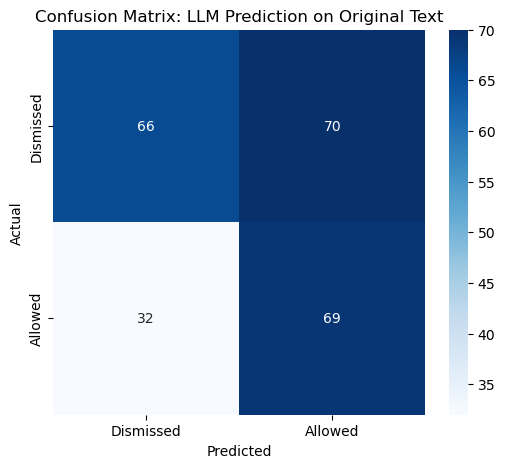

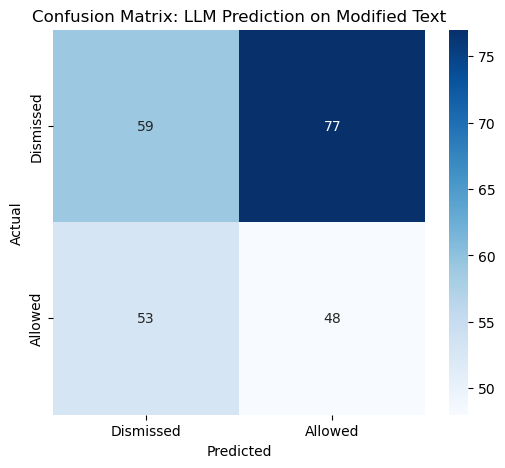

In [15]:
# Confusion matrix for LLM on original text
cm_original = confusion_matrix(df['actual_result'], df['LLM_prediction'])
plt.figure(figsize=(6, 5))
sns.heatmap(cm_original, annot=True, fmt="d", cmap="Blues", xticklabels=["Dismissed", "Allowed"], yticklabels=["Dismissed", "Allowed"])
plt.title("Confusion Matrix: LLM Prediction on Original Text")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Confusion matrix for LLM on replaced text
cm_replaced = confusion_matrix(df['actual_result'], df['Modified_text_prediction'])
plt.figure(figsize=(6, 5))
sns.heatmap(cm_replaced, annot=True, fmt="d", cmap="Blues", xticklabels=["Dismissed", "Allowed"], yticklabels=["Dismissed", "Allowed"])
plt.title("Confusion Matrix: LLM Prediction on Modified Text")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


From the figures we can conclude that:
* The LLM performed better on the original text but when contradictory realities are augmented after the stereotypical sentences thr LLM struggeled.
* Increased FP and FN in the modified text suggest that the model relied on specific concept for decision-making, indicating potential bias in predictions.

In [16]:
# Agreement between LLM predictions and the actual results
df['LLM_prediction_correct'] = df['actual_result'] == df['LLM_prediction']
df['Modified_text_prediction_correct'] = df['actual_result'] == df['Modified_text_prediction']

# Print percentage of correct predictions
LLM_prediction_correct_percentage = (df['LLM_prediction_correct'].sum() / len(df)) * 100
Modified_text_prediction_correct_percentage = (df['Modified_text_prediction_correct'].sum() / len(df)) * 100

print(f"Percentage of correct LLM predictions (Original): {LLM_prediction_correct_percentage:.2f}%")
print(f"Percentage of correct LLM predictions (Replaced): {Modified_text_prediction_correct_percentage:.2f}%")


Percentage of correct LLM predictions (Original): 56.96%
Percentage of correct LLM predictions (Replaced): 45.15%
